<div class="alert alert-block alert-success">
    <h1 align="center"> Regularization Regression (Advertising Dataset) </h1>
    <h3 align="center"><a href="https://github.com/amirhosein-ziaei">Amirhosein Ziaei</a></h3>
</div>

## *Regularization*

#### There are 4 types of Regularization. We will cover the first two in this article

* L1 regularization (Lasso)
* L2 regularization (Ridge)
* dropout regularization
* L1-L2 regularization (Elastic Net)

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. The key difference between these two is the penalty term.

<p align="center">
    <img src="images/Overfitting_Underfitting.png" width="680"\>
</p>

### Lasso Regression

Least absolute shrinkage and selection operator regression (usually just called lasso regression) is another regularized version of linear regression: just like peak regression, it adds a regularization term to the cost function. , but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.

<p align="center">
    <img src="images/Lasso.png" width="680"\>
</p>

A model that uses l1 regularization is called Lasso regression. Lasso regression (Least Absolute Shrinkage and Selection Operator) adds the absolute value of the magnitude of coefficient as penalty term to the loss function.

The value of lambda must be balanced. A very small value will lead back to an OLS (Ordinary Least Square) and a very large value will drive the coefficients to zero. Hence the model will under-fit.

### Ridge Regression

Ridge regression is a regularized version of linear regression. This forces the training algorithm not only to fit the data but also to keep the model weights as small as possible.
Note that the accrual term should only be added to the cost function during training. After you train the model, you want to use the unregulated performance measure to evaluate the performance of the model.

<p align="center">
    <img src="images/Ridge.png" width="680"\>
</p>

A model that uses l2 regularization is called Ridge regression. It is one of the more widely used techniques. This technique adds the “squared magnitude” of the coefficient as the penalty to the loss function. Here the value of lambda should be chosen appropriately just like l1 regularization. A small value of lambda will lead to OLS and a large value will lead to an under-fitting issue.

***One key point to note about l1 regularization (or) Lasso regression is that it shrinks the less important features to zero making it extremely useful for feature selection.***

## *Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## *Importing Dataset*

In [19]:
data = pd.read_csv("Dataset\Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## *Exploratory Data Analysis and Visualization*

In [20]:
data = data.iloc[:,1:]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


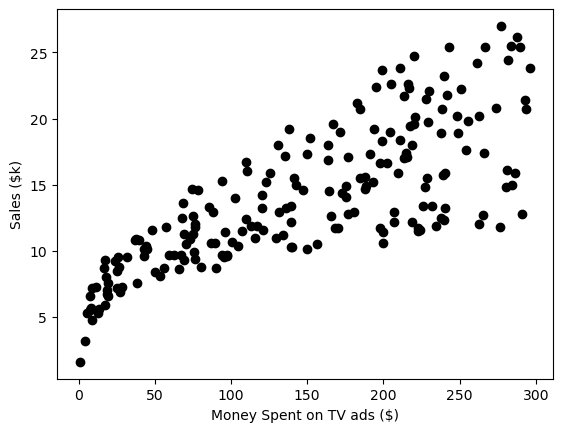

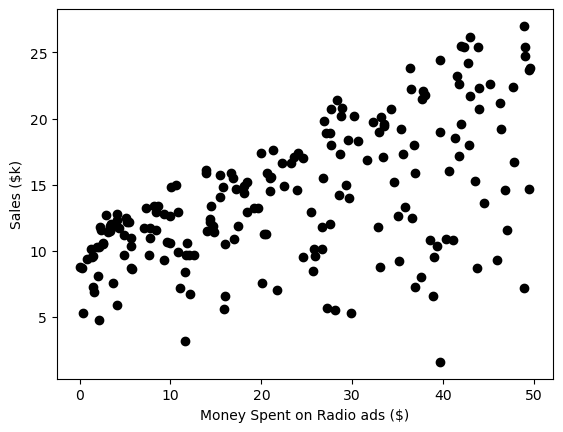

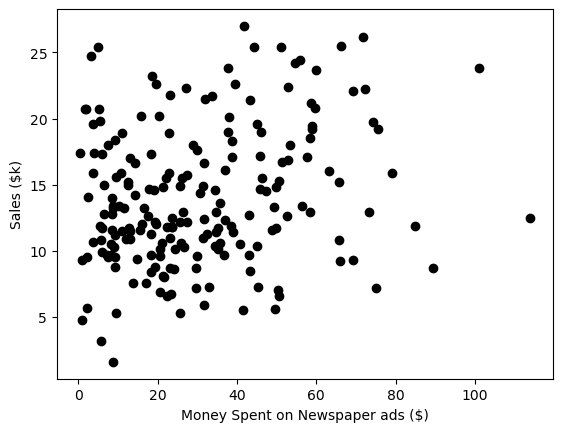

In [21]:
def scatter_plot(feature, target):
    plt.scatter(data[feature],
                data[target],
                c='black'
                )
    plt.xlabel("Money Spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()
scatter_plot("TV", "Sales")
scatter_plot("Radio", "Sales")
scatter_plot("Newspaper", "Sales")

## *Train Model*

### *Train model Without Regularization*

In [22]:
xs = data.drop(["Sales"], axis=1)
y = data["Sales"].values.reshape(-1,1)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
MSE = cross_val_score(linreg, xs, y, scoring="neg_mean_squared_error", cv=5)

In [24]:
mean_MSE = np.mean(MSE)
print(mean_MSE)

-3.07294659710021


### *Traing Model With Ridge Regularization*

***Ridge Regression***

For the ridge regression algorithm, I will use GridSearchCV model provided by Scikit-learn, which will allow us to automatically perform the 5-fold cross-validation to find the optimal value of alpha.

In [25]:
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(xs, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [26]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 20}
-3.072671338341143


### *Traing Model With Lasso Regularization*

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(xs, y)

c:\Users\amirhosein\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.026e+02, tolerance: 4.383e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\amirhosein\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.282e+02, tolerance: 4.503e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\amirhosein\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.59

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [29]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1}
-3.041405896751369
